In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [2]:
# Load the VGG19 model
# https://keras.io/applications/#VGG19
model = VGG19(include_top=True, weights='imagenet')

In [3]:
# Define default image size for VGG19
image_size = (224, 224)

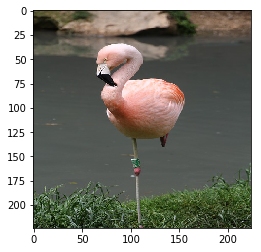

In [4]:
# Load the image and resize to default image size
image_path = os.path.join(".", "Images", "bird1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [8]:

# Preprocess image for model prediction
# This step handles scaling and normalization for VGG19
x = image.img_to_array(img)
print("Image to Array " + str(x))
x = np.expand_dims(x, axis=0)
print("Image expand Dimensions" + str(x))
x = preprocess_input(x)
print("Preprocess",x)

Image to Array [[[117.  99.  75.]
  [116. 100.  74.]
  [110.  99.  71.]
  ...
  [ 68.  50.  40.]
  [ 67.  49.  39.]
  [ 73.  54.  47.]]

 [[ 95.  79.  56.]
  [ 98.  84.  58.]
  [104.  92.  66.]
  ...
  [ 75.  57.  45.]
  [ 72.  54.  42.]
  [ 69.  51.  41.]]

 [[ 65.  59.  33.]
  [ 73.  67.  41.]
  [ 75.  70.  41.]
  ...
  [ 81.  62.  48.]
  [ 71.  52.  38.]
  [ 74.  54.  43.]]

 ...

 [[ 65.  85.  57.]
  [ 29.  47.  21.]
  [ 28.  40.  18.]
  ...
  [ 12.  20.   5.]
  [ 26.  37.  20.]
  [100. 112.  90.]]

 [[ 13.  33.   6.]
  [ 46.  66.  39.]
  [ 36.  49.  29.]
  ...
  [112. 120. 105.]
  [ 48.  57.  38.]
  [ 13.  23.   0.]]

 [[ 45.  63.  37.]
  [ 34.  54.  29.]
  [ 29.  44.  23.]
  ...
  [ 42.  51.  34.]
  [ 91. 100.  81.]
  [ 79.  89.  65.]]]
Image expand Dimensions[[[[117.  99.  75.]
   [116. 100.  74.]
   [110.  99.  71.]
   ...
   [ 68.  50.  40.]
   [ 67.  49.  39.]
   [ 73.  54.  47.]]

  [[ 95.  79.  56.]
   [ 98.  84.  58.]
   [104.  92.  66.]
   ...
   [ 75.  57.  45.]
   [ 72.

40960/35363 [==================================] - 0s 2us/step
Predicted: [[('n02007558', 'flamingo', 0.96885955), ('n01855672', 'goose', 0.009939612), ('n02006656', 'spoonbill', 0.008081733)]]


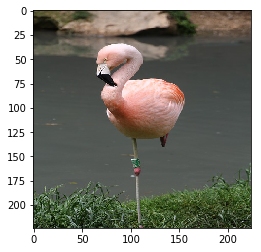

In [10]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [11]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print(decode_predictions(predictions))
    print('Predicted:', decode_predictions(predictions, top=3))

Predicted: [[('n01622779', 'great_grey_owl', 0.9347008), ('n01608432', 'kite', 0.008001395), ('n02018795', 'bustard', 0.006982948)]]


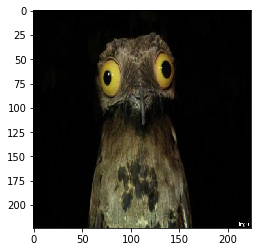

In [12]:
image_path = os.path.join(".", "Images", "bird2.jpg")
predict(image_path)

Predicted: [[('n02113023', 'Pembroke', 0.97768915), ('n02113186', 'Cardigan', 0.022149172), ('n02110806', 'basenji', 7.7072225e-05)]]


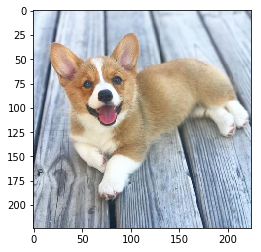

In [13]:
image_path = os.path.join(".", "Images", "corgi.jpg")
predict(image_path)